### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By


# Set up Chrome WebDriver
service = Service('r"chromedriver.exe')  
driver = webdriver.Chrome(service=service)

# Take user input for the product to search
user_input = input("Enter the product to search on Amazon: ")

# Navigate to Amazon.in
driver.get('https://www.amazon.in')

# Find the search box and enter the keyword
search_box = driver.find_element(By.ID, 'twotabsearchtextbox')
search_box.send_keys(user_input)
search_box.submit()

# Wait for the search results to load (adjust the sleep time if needed)
driver.implicitly_wait(5)

# Get the page source after search
page_source = driver.page_source




Enter the product to search on Amazon: tv


### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: 
"Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [12]:
import pandas as pd
from bs4 import BeautifulSoup

def scrape_product_details(product_element):
    # Extract the brand name, product name, price, return/exchange info, expected delivery, availability, and product URL
    brand_element = product_element.find('span', {'class': 'a-size-base-plus a-color-base'})
    product_name_element = product_element.find('span', {'class': 'a-size-medium a-color-base a-text-normal'})
    price_element = product_element.find('span', {'class': 'a-price-whole'})
    return_exchange_element = product_element.find('div', {'class': 'a-row a-size-small'})
    expected_delivery_element = product_element.find('span', {'class': 'a-text-bold'})
    availability_element = product_element.find('span', {'class': 'a-size-base a-color-success'})
    product_url = product_element.find('a', {'class': 'a-link-normal s-no-outline'})['href']

    # Extract the text from the elements or replace with "-" if not found
    brand = brand_element.text.strip() if brand_element else "-"
    product_name = product_name_element.text.strip() if product_name_element else "-"
    price = price_element.text.strip() if price_element else "-"
    return_exchange = return_exchange_element.text.strip() if return_exchange_element else "-"
    expected_delivery = expected_delivery_element.text.strip() if expected_delivery_element else "-"
    availability = availability_element.text.strip() if availability_element else "-"
    product_url = f"https://www.amazon.in{product_url}" if product_url else "-"

    return brand, product_name, price, return_exchange, expected_delivery, availability, product_url

def scrape_search_results(keyword, max_pages=3):
    # Parse the HTML content
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all the product elements
    product_elements = soup.find_all('div', {'data-component-type': 's-search-result'})

    product_data = []

    # Scrape details for each product
    for product_element in product_elements:
        product_details = scrape_product_details(product_element)
        product_data.append(product_details)

    # Check if there are more pages to scrape
    next_button = driver.find_element(By.CSS_SELECTOR, '.s-pagination-container .s-pagination-next')
    if next_button.get_attribute('aria-disabled') == 'true' or max_pages <= 1:
        return product_data

    # Go to the next page
    next_button.click()

    # Wait for the next page to load
    driver.implicitly_wait(10)

    # Recursively scrape the remaining pages
    return product_data + scrape_search_results(keyword, max_pages=max_pages - 1)

# Get the page source after search
page_source = driver.page_source

# Scrape the search results
product_data = scrape_search_results(user_input, max_pages=3)

# Create a DataFrame from the scraped data
columns = ["Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Product URL"]
df = pd.DataFrame(product_data, columns=columns)

# Save the DataFrame to a CSV file
df.to_csv('amazon_products.csv', index=False)


In [13]:
df

,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,-,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,"22,999","4.2 out of 5 stars 39,294","Sat, 10 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,-,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,"37,999","4.2 out of 5 stars 9,740","Sat, 10 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,-,Samsung 80 cm (32 Inches) Wondertainment Serie...,"12,990","4.2 out of 5 stars 9,925","Fri, 9 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/Samsung-Inches-Wondertai...
3,-,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"12,999","4.2 out of 5 stars 39,294","Fri, 9 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/OnePlus-inches-Ready-And...
4,-,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"11,999","4.2 out of 5 stars 41,391","Fri, 9 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/MI-inches-Ready-Android-...
...,...,...,...,...,...,...,...
61,-,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"39,999","4.5 out of 5 stars 2,055","Sat, 10 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/VU-inches-GloLED-Google-...
62,-,iFFALCON 147 cm (58 inches) 4K Ultra HD Smart ...,"33,999",4.3 out of 5 stars 633,"Sat, 10 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/iFFALCON-inches-Ultra-Go...
63,-,Redmi 80 cm (32 inches) Android 11 Series HD R...,"10,999","4.2 out of 5 stars 50,406","Sat, 10 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/Redmi-inches-Ready-L32M6...
64,-,Redmi 80 cm (32 inches) Android 11 Series HD R...,"10,999","4.2 out of 5 stars 50,406","Sat, 10 Jun, 7:00 am - 9:00 pm",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


### 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [25]:
# Import all modules
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to https://images.google.com/
driver.get("https://images.google.com/")

#Accept cookies
cookies_button = driver.find_element(By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div[1]/button[2]/div")
cookies_button.click()














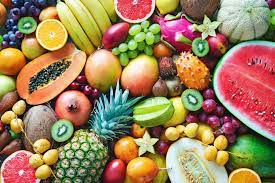
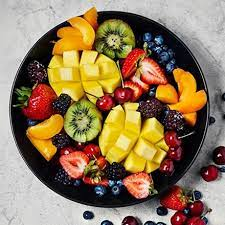
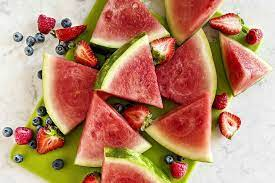
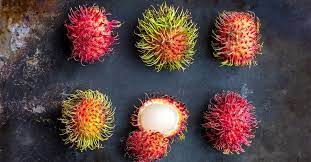
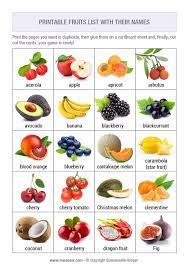
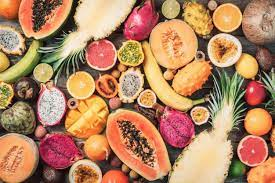
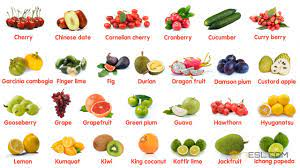
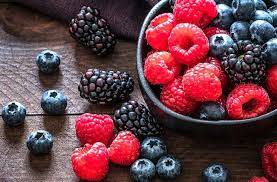
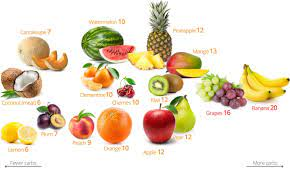
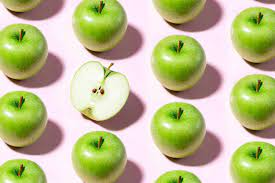

In [27]:
# Find the search box and enter the keyword "fruits"
search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys("fruits")

# Find the search button and click it
search_button = driver.find_element(By.XPATH, "//button[@aria-label='Google Search']")
search_button.click()

# Wait for the search results to load (adjust the sleep time if needed)
time.sleep(5)

# Get the page source after search
page_source = driver.page_source

images = driver.find_elements(By.XPATH, "//img[@class='rg_i Q4LuWd']")
fruit_image_urls = []
for i in range(10):
    image_url = images[i].get_attribute("src")
    fruit_image_urls.append(image_url)
    
# Display the scraped image URLs
for url in fruit_image_urls:
    print(url)

In [28]:
#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to https://images.google.com/
driver.get("https://images.google.com/")

#Accept cookies
cookies_button = driver.find_element(By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div[1]/button[2]/div")
cookies_button.click()
# Find the search box and enter the keyword "cars"
search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys("cars")

# Find the search button and click it
search_button = driver.find_element(By.XPATH, "//button[@aria-label='Google Search']")
search_button.click()













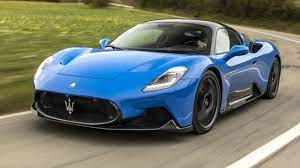
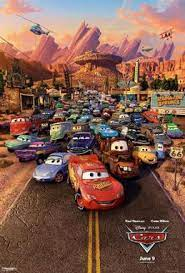
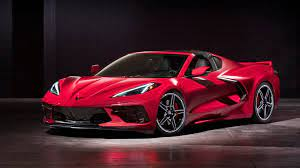
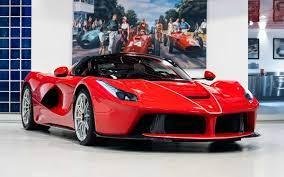
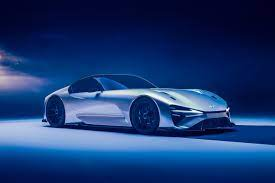
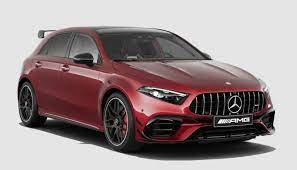
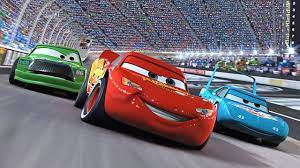
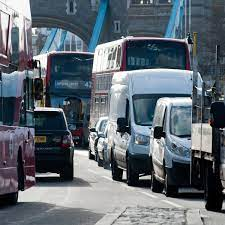
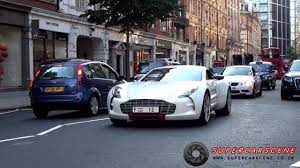
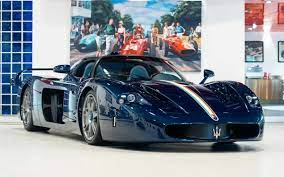

In [29]:
# Wait for the search results to load (adjust the sleep time if needed)
time.sleep(5)

# Get the page source after search
page_source = driver.page_source

images = driver.find_elements(By.XPATH, "//img[@class='rg_i Q4LuWd']")
car_image_urls = []
for i in range(10):
    image_url = images[i].get_attribute("src")
    car_image_urls.append(image_url)

# Display the scraped image URLs
for url in car_image_urls:
    print(url)

In [30]:
#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to https://images.google.com/
driver.get("https://images.google.com/")

#Accept cookies
cookies_button = driver.find_element(By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div[1]/button[2]/div")
cookies_button.click()
# Find the search box and enter the keyword "cars"
search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys("machine learning")

# Find the search button and click it
search_button = driver.find_element(By.XPATH, "//button[@aria-label='Google Search']")
search_button.click()












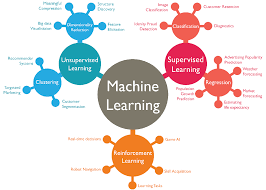
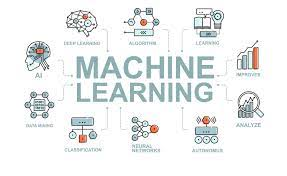
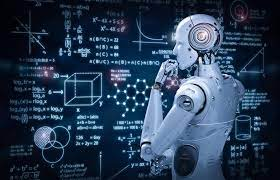
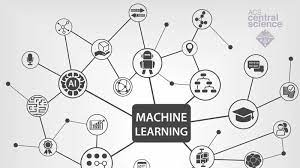
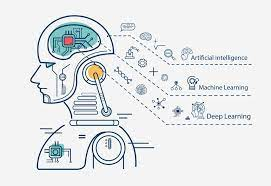
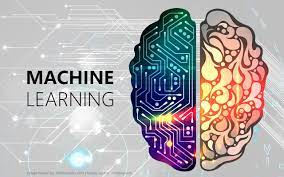
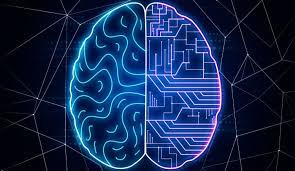
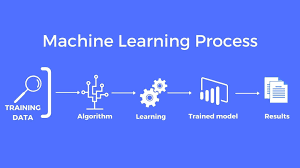
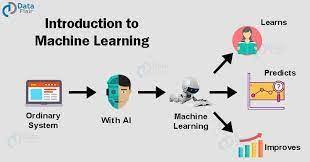
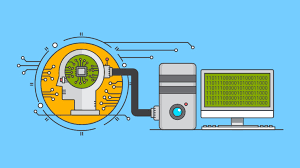

In [32]:
# Wait for the search results to load (adjust the sleep time if needed)
time.sleep(5)

# Get the page source after search
page_source = driver.page_source

images = driver.find_elements(By.XPATH, "//img[@class='rg_i Q4LuWd']")
ML_image_urls = []
for i in range(10):
    image_url = images[i].get_attribute("src")
    ML_image_urls.append(image_url)
    
# Display the scraped image URLs
for url in ML_image_urls:
    print(url)

In [33]:
#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to https://images.google.com/
driver.get("https://images.google.com/")

#Accept cookies
cookies_button = driver.find_element(By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div[1]/button[2]/div")
cookies_button.click()
# Find the search box and enter the keyword "cars"
search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys("guitar")

# Find the search button and click it
search_button = driver.find_element(By.XPATH, "//button[@aria-label='Google Search']")
search_button.click()












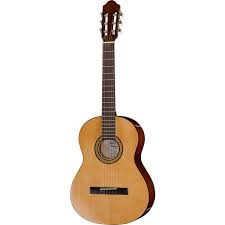
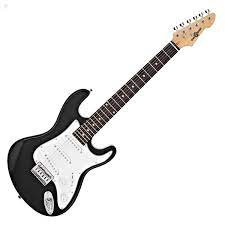
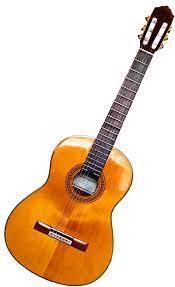
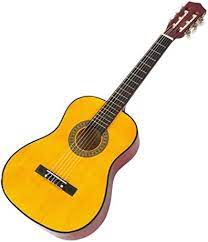
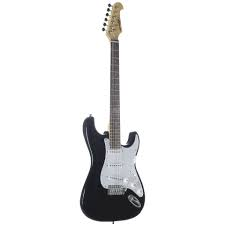
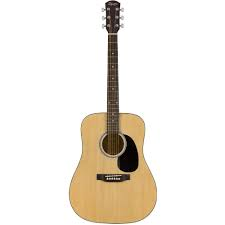
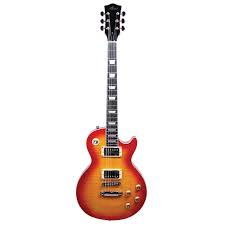
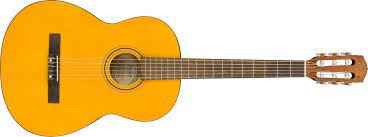
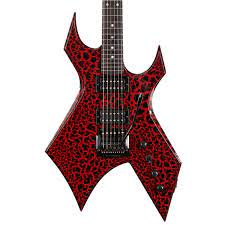
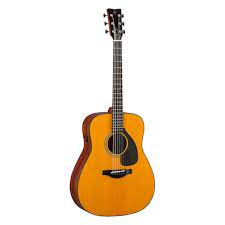

In [36]:
# Wait for the search results to load (adjust the sleep time if needed)
time.sleep(5)

# Get the page source after search
page_source = driver.page_source

images = driver.find_elements(By.XPATH, "//img[@class='rg_i Q4LuWd']")
guitar_image_urls = []
for i in range(10):
    image_url = images[i].get_attribute("src")
    guitar_image_urls.append(image_url)
    
# Display the scraped image URLs
for url in guitar_image_urls:
    print(url)
  

In [37]:
#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to https://images.google.com/
driver.get("https://images.google.com/")

#Accept cookies
cookies_button = driver.find_element(By.XPATH, "/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div[1]/button[2]/div")
cookies_button.click()
# Find the search box and enter the keyword "cars"
search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys("cakes")

# Find the search button and click it
search_button = driver.find_element(By.XPATH, "//button[@aria-label='Google Search']")
search_button.click()












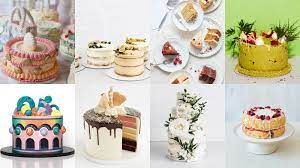
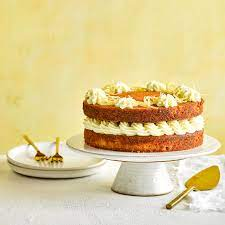
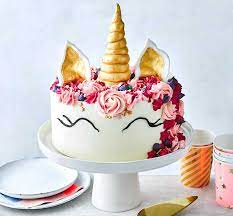
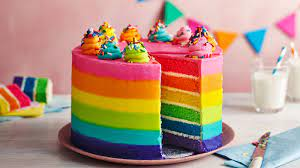
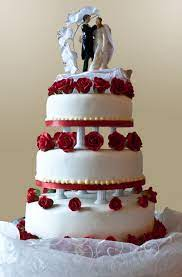
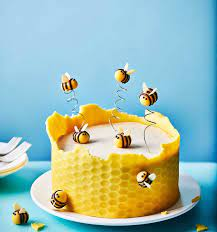
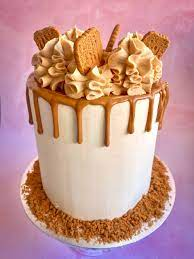
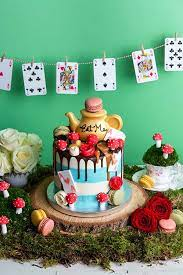
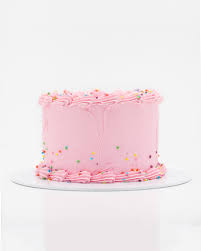
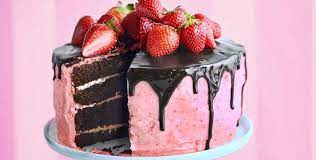

In [39]:
# Wait for the search results to load (adjust the sleep time if needed)
time.sleep(5)

# Get the page source after search
page_source = driver.page_source

images = driver.find_elements(By.XPATH, "//img[@class='rg_i Q4LuWd']")
cakes_image_urls = []
for i in range(10):
    image_url = images[i].get_attribute("src")
    cakes_image_urls.append(image_url)
    
# Display the scraped image URLs
for url in cakes_image_urls:
    print(url)

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [75]:
# Import all modules
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to https://www.flipkart.com/
driver.get("https://www.flipkart.com/")

# Cancel login prompt
try:
    login_prompt = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/button").click()
except:
    pass


In [76]:
# Find the search box and enter the keyword "OnePlus Nord"
search_box = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_box.send_keys("OnePlus Nord")


In [77]:
# Find the search button and click it
search_button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button").click()
# wait for website to load

driver.implicitly_wait(5)

In [78]:
data = []

# Find the search result containers
result_containers = driver.find_elements(By.XPATH, "//div[@class='_1AtVbE col-12-12']")

# Scrape details for each search result

for container in result_containers:
    # Initialize variables for each detail
    brand_name = "-"
    phone_name = "-"
    color = "-"
    ram = "-"
    rom = "-"
    primary_camera = "-"
    display_size = "-"
    battery_capacity = "-"
    price = "-"
    product_url = "-"
      # Extract the details from the container
    try:
        text = container.find_element(By.XPATH, ".//div[@class='_4rR01T']").text
        split_text = text.split('(')
        brand_name = split_text[0].split()[0]
        phone_name = ' '.join(split_text[0].split()[1:])
        color = split_text[1].split(',')[0]
    except:
        brand_name = "-"
        phone_name = "-"
        color = "-"
        
    try:
        ram = container.find_element(By.XPATH, ".//ul/li[1]").text
        ram_values = ram.split("|")
        
        if len(ram_values) == 2:
            ram, rom = ram_values[0].strip(), ram_values[1].strip()
        else:
            rom = "-"
    except:
        ram = "-"
        rom = "-"
    
    try:
        primary_camera = container.find_element(By.XPATH, ".//ul/li[3]").text
    except:
        pass
    
    try:
        display_size = container.find_element(By.XPATH, ".//ul/li[2]").text
    except:
        pass
    
    try:
        battery_capacity = container.find_element(By.XPATH, ".//ul/li[4]").text
    except:
        pass
    
    try:
        price = container.find_element(By.XPATH, ".//div[@class='_30jeq3 _1_WHN1']").text
    except:
        pass
    
    try:
        product_url = container.find_element(By.XPATH, ".//a[contains(@class,'_1fQZEK')]").get_attribute("href")
    except:
        pass
    
    data.append({
        "Brand Name": brand_name,
        "Smartphone Name": phone_name,
        "Colour": color,
        "RAM": ram,
        "Storage(ROM)": rom,
        "Primary Camera": primary_camera,
        "Display Size": display_size,
        "Battery Capacity": battery_capacity,
        "Price": price,
        "Product URL": product_url
    })
    
# Close the browser
driver.quit()

# Create a DataFrame from the scraped data
df = pd.DataFrame(data)

In [79]:
df

,Brand Name,Smartphone Name,Colour,RAM,Storage(ROM),Primary Camera,Display Size,Battery Capacity,Price,Product URL
0,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-
2,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹18,725",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,OnePlus,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹18,749",https://www.flipkart.com/oneplus-nord-ce-2-lit...
4,OnePlus,Nord 2T 5G,Gray Shadow,8 GB RAM,128 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹28,895",https://www.flipkart.com/oneplus-nord-2t-5g-gr...
5,OnePlus,Nord 2T 5G,Gray Shadow,8 GB RAM,128 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹28,920",https://www.flipkart.com/oneplus-nord-2t-5g-gr...
6,OnePlus,Nord CE 2 Lite 5G,Black Dusk,8 GB RAM,128 GB ROM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹21,999",https://www.flipkart.com/oneplus-nord-ce-2-lit...
7,OnePlus,Nord 2 5G,PAC-MAN,12 GB RAM,256 GB ROM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹37,999",https://www.flipkart.com/oneplus-nord-2-5g-pac...
8,OnePlus,Nord CE 5G,Silver Ray,12 GB RAM,256 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹27,990",https://www.flipkart.com/oneplus-nord-ce-5g-si...
9,OnePlus,Nord 2 5G,Blue Haze,12 GB RAM,256 GB ROM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹32,296",https://www.flipkart.com/oneplus-nord-2-5g-blu...


### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [95]:
# Import all modules
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

# Enter the city name to search
city_name = "New York"

#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to GOOGLE MAPS WEBSITE
driver.get("https://www.google.com/maps")

# Accept cookies

cookies_button = driver.find_element(By.XPATH, "/html/body/c-wiz/div/div/div/div[2]/div[1]/div[3]/div[1]/div[1]/form[2]/div/div/button/span")
cookies_button.click()


In [96]:
# Find the search box and enter the city
search_box = driver.find_element(By.XPATH, '/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div/div[2]/form/input[1]')
search_box.send_keys(city_name)


In [97]:
# Find the search button and click it
search_button = driver.find_element(By.XPATH, "/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button").click()
# wait for website to load

driver.implicitly_wait(5)

In [94]:
# UNABLE TO INSPECT ON GOOGLE MAP AREA

### 6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [116]:
# Import all modules
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

#Connecting to driver
driver=webdriver.Chrome(r"chromedriver.exe") 

# Navigate to DIGIT.IN
driver.get("https://www.digit.in/")

In [123]:
search = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[2]").click()


In [135]:
from selenium.webdriver.common.keys import Keys

search_field= driver.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[3]/div/div/input")
search_field.send_keys("Best Gaming Laptop")
search_field.send_keys(Keys.RETURN)

In [142]:
product_details = []

# Scrape product details from 10 pages
for page in range(1, 11):
    # Get the HTML content of the page
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    
    for i in soup.find_all('div', class_='searchProduct-desc'):
        product_details.append(i.text)
    
    # Add the product details to the list
    product_details.append({'PRODUCT':laptop_container })

    # Go to the next page
    next_button = driver.find_element(By.XPATH,"//a[@title='Next Page']")
    next_button.click()

    # Wait for the next page to load
    driver.implicitly_wait(10)


In [148]:
df = pd.DataFrame(product_details,columns=['Best gaming laptops'])

In [149]:
df

,Best gaming laptops
0,LENOVO LEGION Y540
1,Dell New Alienware M14x U540518IN8
2,MSI GE62 6QD Apache Pro
3,HP 15-r014TX
4,Acer Aspire R7-572G
...,...
105,ASUS TUF Gaming H5
106,CosmicByte GS410 Gaming Headset
107,Acer Nitro 5: The best value for money gaming ...
108,"MSI unveils GS75 Stealth laptop, PS63 Modern l..."


### 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [196]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Create ChromeOptions object
options = Options()
options.add_argument("--start-maximized")

# Create ChromeDriver with options
driver = webdriver.Chrome(options=options)

# Navigate to the Forbes billionaires page
driver.get("https://www.forbes.com/billionaires/")

# Wait for the billionaires table to load
driver.implicitly_wait(3)

# close cookies banner
close_button = driver.find_element(By.XPATH,"/html/body/div/div/div/div/div[2]/button[2]/span")
close_button.click()


# Wait for the billionaires table to load
driver.implicitly_wait(10)


In [197]:
# Find all rows in the table
rows=[]
a=driver.find_element(By.XPATH,"//div[@class='TableRow_row__L-0Km TableRow_activeRow__g4oSF']").text
rows.append(a)
row_tags=driver.find_elements(By.XPATH,"//div[@class='TableRow_row__L-0Km']")

for i in row_tags:
    n=i.text
    rows.append(n)

In [198]:
df=pd.DataFrame(rows)

In [199]:
# Split the single column into separate columns
df = df[0].str.split('\n', expand=True)

# Rename the columns
df.columns = ['Rank', 'Name', 'Net Worth', 'Age', 'Citizenship', 'Source', 'Industry']

# Print the updated DataFrame
df

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


### 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [257]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
import time

# Create ChromeOptions object
options = Options()
options.add_argument("--start-maximized")

# Create ChromeDriver with options
driver = webdriver.Chrome(options=options)

# Navigate to the Youtube page
driver.get("https://www.youtube.com/watch?v=SJNbnVjecf0")

# Wait for the page to load
driver.implicitly_wait(5)

 # accept cookies banner
cookies_button = driver.find_element(By.XPATH,"/html/body/ytd-app/ytd-consent-bump-v2-lightbox/tp-yt-paper-dialog/div[4]/div[2]/div[6]/div[1]/ytd-button-renderer[2]/yt-button-shape/button")
cookies_button.click()

In [258]:
# Scroll down to load more comments
comment_count = 0
while comment_count < 500:
    # Scroll to the bottom of the page
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)

    # Wait for the comments to load
    
    driver.implicitly_wait(5)  # Wait for a few seconds to load the comments

    # Find all comment elements
    comment_elements = driver.find_elements(By.XPATH, "//yt-formatted-string[@class='style-scope ytd-comment-renderer']")
    # Find all comment upvote element
    upvote_elements = driver.find_elements(By.XPATH, "//div[@class='yt-spec-touch-feedback-shape__fill']")

    # Find all time posted elements
    time_elements = driver.find_elements(By.XPATH, "//yt-formatted-string[@class='published-time-text style-scope ytd-comment-renderer']")

    # Extract the text from each element
    comments = [comment.text for comment in comment_elements]
    upvotes = [upvote.text for upvote in upvote_elements]
    times = [time.text for time in time_elements]

    # Update the comment count
    comment_count += len(comments)

In [260]:
print(len(upvotes),len(comments),len(times))


596 160 180


In [262]:
df=pd.DataFrame({"Comments":comments})
ab=pd.DataFrame({"Upvotes":upvotes})
cd=pd.DataFrame({"Times":times})
print(df)
print(ab)
print(cd)

                                              Comments
0    3 Videos in 3 DAYS!  Here are the other two:\n...
1    The cheapest, 70$ laptop STILL somehow manages...
2    Wish you didn’t skip from $70 to $500, I think...
3    Just a quick note, the downward facing speaker...
4    Honestly, the $70 laptop is quite nice. I woul...
..                                                 ...
155  I bought a laptop Chromebook four months ago f...
156  The 500$ laptop should be able to get good lat...
157  I really really disliked laptops with too many...
158  I will be more than happy to have the $500 lap...
159  Me watching this knowing i cant even afford th...

[160 rows x 1 columns]
    Upvotes
0          
1          
2          
3          
4          
..      ...
591        
592        
593        
594        
595        

[596 rows x 1 columns]
                     Times
0             2 months ago
1    2 months ago (edited)
2             2 months ago
3             2 months ago
4    2 months

#### Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property descr

In [293]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException

# Create ChromeOptions object
options = Options()
options.add_argument("--start-maximized")

# Create ChromeDriver with options
driver = webdriver.Chrome(options=options)

# Navigate to the Web page
driver.get("https://www.hostelworld.com/ ")

# Wait for the page to load
driver.implicitly_wait(5)

#Accept cookies
accept= driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[4]/div/div/div[2]/button[2]').click()


In [297]:
# Find the search box and enter the keyword "London"
search_box = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
search_box.send_keys("London")


In [301]:
go=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button').click()

In [304]:
hostel_name=[]
distance=[]
ratings=[]
review=[]
rev_num=[]
privates=[]
dorm=[]


# Scraping rating from the given page

    
try:
        name_tags=driver.find_elements(By.XPATH,"//div[@class='property-name']")
        for i in name_tags[0:100]:
            n=i.text
            hostel_name.append(n)
except NoSuchElementException :
        hostel_name.append("Null")
        

try:
        rate_tags=driver.find_elements(By.XPATH,"//div[@class='score-row']")
        for i in rate_tags[0:100]:
            r=i.text
            ratings.append(r)
except NoSuchElementException :
        ratings.append("Null")

try:
        dis_tags=driver.find_elements(By.XPATH,"//span[@class='distance-description']")
        for i in dis_tags[0:100]:
            dis=i.text
            distance.append(dis)
except NoSuchElementException :
        distance.append("Null")  
        
    
try:
        rev_tags=driver.find_elements(By.XPATH,"//div[@class='keyword']")
        for i in rev_tags[0:100]:
            re=i.text
            review.append(re)
except NoSuchElementException :
        review.append("Null")    

    
try:
        num_tags=driver.find_elements(By.XPATH,"//span[@class='left-margin']")
        for i in num_tags[0:100]:
            num=i.text
            rev_num.append(num)
except NoSuchElementException :
        rev_num.append("Null")  
        

try:
        pri_tags=driver.find_elements(By.XPATH,"//div[@class='accommodation-price single-row']")
        for i in pri_tags[0:100]:
            pr=i.text
            privates.append(pr)
    
except NoSuchElementException :
        privates.append("Null") 
       


    
try:
    dorm_tags=driver.find_elements(By.XPATH,"//span[@class='left-margin']")
    for i in dorm_tags[0:100]:
            do=i.text
            dorm.append(do)
            
except NoSuchElementException :
        dorm.append("Null") 
    
    
    
print(len(dorm),len(privates),len(rev_num),len(review),len(ratings),len(distance),len(hostel_name)) 

30 39 30 28 30 30 30


In [309]:
                 
df=pd.DataFrame({"Hostel Name":hostel_name,"Distance from city":distance,"Ratings":ratings,"Total review":rev_num,"Dorms from":dorm})
df


,Hostel Name,Distance from city,Ratings,Total review,Dorms from
0,Onefam Notting Hill by Hostel One,- 5.5km from city centre,9.6\nSuperb,(2053),(2053)
1,Urbany Hostel London,- 5.4km from city centre,9.4\nSuperb,(778),(778)
2,Generator London,- 3km from city centre,7.5\nVery Good,(7496),(7496)
3,Safestay London Elephant & Castle,- 1.7km from city centre,7.5\nVery Good,(4952),(4952)
4,Phoenix Hostel,- 4.2km from city centre,7.6\nVery Good,(4125),(4125)
5,No.8 Willesden Hostel London,- 10km from city centre,6.5\nGood,(5013),(5013)
6,Destinations Hostels @ The Gallery,- 1.7km from city centre,9.3\nSuperb,(162),(162)
7,Clink261,- 3.2km from city centre,8.3\nFabulous,(264),(264)
8,Safestay London Kensington Holland Park,- 5.8km from city centre,7.1\nVery Good,(1525),(1525)
9,London Backpackers,- 11.9km from city centre,7.9\nVery Good,(4468),(4468)
